Select a data-driven company to work with

Procure a dataset that would be interesting for the company chosen

Characterize the dataset

Describe the feautures in your dataset
Charactization of the dataset: number of samples (rows), number of features (columns), continuity of data (neighbouring data points have similar values), signal to noise ratio, manifold number of dimensions of the underlying process that generated the dataset (an audio file has many dimensions, but only a few muscles in our face are used to speak).

Then using the content from slides in Module 1:
including preparation steps you would expect to need for the dataset you chose
the question that you plan to try to answer
the type of analytics that you expect you would need to answer the question you posed about your dataset

# Netflix Userbase Dataset

The data-driven company we choose to work with is Netflix, taking the dataset called "Netflix Userbase Dataset" which contains information of various aspects of user like subscriptions, revenue, account details, and activity.

Source: https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset?resource=download

**Question:** What is archetype of person that would pay the highest suscription level and give Netflix a higher revenue?

**Why?** This question will tackle the problem of analyzing data in order to get valuable insights and create an effective marketing strategy, so netflix could focus its campaigns in the customers that give them a higher revenue, knowing its characteristics. As this dataset contains information about netflix's users, its a good opportunity to characterize the type of customer that would give Netflix the highest revenue.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/afscomercial/big-data-fundamental/main/netflix.csv')
dataset.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


# Features description


**Suscription type**
* Basic: Is the most basic kind of suscription


Number of observations and features:


In [5]:
# Access the shape values. 0 index for rows and index 1 for columns
print(f'Number of observations: {dataset.shape[0]}')
print(f'Number of features: {dataset.shape[1]}')

Number of observations: 2500
Number of features: 10


Types of data and number of each kind:

In [22]:
unique_values_count = dataset.nunique()
unique_values_count


User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

# Continuity of Data

#Signal to noise ratio

# Number of dimensions of the underlying process that generated the dataset

(an audio file has many dimensions, but only a few muscles in our face are used to speak)

# Preparation Steps

To answer this question we can create different types of analytics that would help us identify this target customers, for instance:

* Pair plots
* Correlation index

# Convert the cualitative features into cuantitative

First we need to convert the cualitative features into unique numerical values that represent each type of value inside each feature and then we can do further analysis

# Graphics

Histogram

<ipython-input-23-f7baf1b1c7a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_revenue, x='Monthly Revenue', y='Country', palette='viridis')


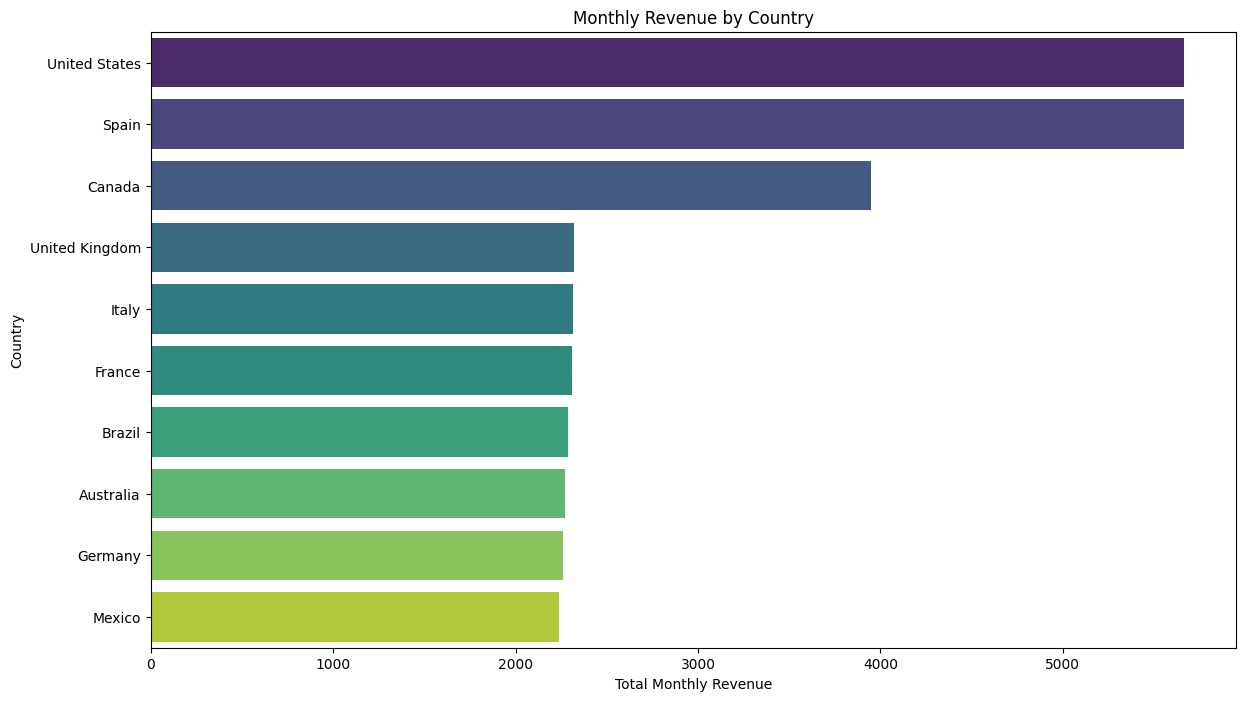

In [23]:
# Group by Country and sum the Monthly Revenue
country_revenue = dataset.groupby('Country')['Monthly Revenue'].sum().reset_index()

# Sort the data by Monthly Revenue in descending order
country_revenue = country_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=country_revenue, x='Monthly Revenue', y='Country', palette='viridis')
plt.title('Monthly Revenue by Country')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Country')
plt.show()

<ipython-input-25-b5ddf972d62f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_revenue, x='Monthly Revenue', y='Age Group', palette='viridis')


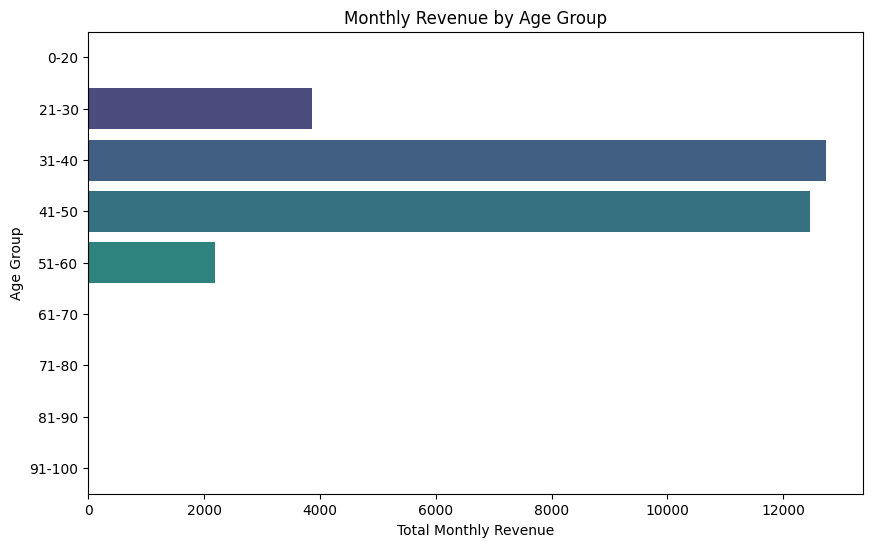

In [25]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Assign age groups to the dataframe
dataset['Age Group'] = pd.cut(dataset['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by Age Group and sum the Monthly Revenue
age_revenue = dataset.groupby('Age Group')['Monthly Revenue'].sum().reset_index()

# Sort the data by Monthly Revenue in descending order
age_revenue = age_revenue.sort_values(by='Monthly Revenue', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=age_revenue, x='Monthly Revenue', y='Age Group', palette='viridis')
plt.title('Monthly Revenue by Age Group')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Age Group')
plt.show()

<ipython-input-26-d02291141ea1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_revenue, x='Monthly Revenue', y='Gender', palette='viridis')


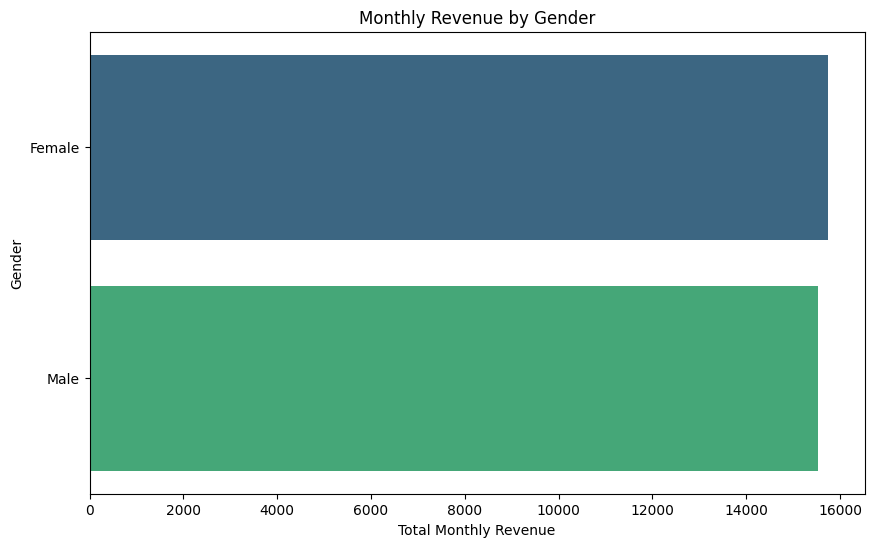

In [26]:
gender_revenue = dataset.groupby('Gender')['Monthly Revenue'].sum().reset_index()


gender_revenue = gender_revenue.sort_values(by='Monthly Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_revenue, x='Monthly Revenue', y='Gender', palette='viridis')
plt.title('Monthly Revenue by Gender')
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Gender')
plt.show()